Importacao de Bibliotecas

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# importando a biblioteca scikit-learn dataset
from sklearn import datasets

sns.set()
# ignorando os warnings
import warnings
warnings.filterwarnings('ignore')
# plotando o matplotl
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option('display.max_columns', None)

## Importando Dataset de Amostra de Clientes

In [2]:
dados = pd.read_csv(r'C:/Users/mauri.leite/Documents/GitHub/DH\Desafio03/Telecom - AMOSTRA CLIENTES.csv', encoding = 'latin1', 
                 engine='python', 
                 delimiter=';', 
                 decimal=",")
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"R$ 29,85","R$ 29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"R$ 56,95","R$ 1.889,50",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"R$ 53,85","R$ 108,15",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"R$ 42,30","R$ 1.840,75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"R$ 70,70","R$ 151,65",Yes


#### Realizando a transformacao dos dados monetarios

In [3]:
dados['MonthlyCharges'] = dados['MonthlyCharges'].replace('[R$]', '', regex=True)
dados['MonthlyCharges'] = dados['MonthlyCharges'].replace('[,]', '.', regex=True)
dados['MonthlyCharges'] = dados['MonthlyCharges'].astype(float)

dados['TotalCharges'] = dados['TotalCharges'].replace('[R$]', '', regex=True)
dados['TotalCharges'] = dados['TotalCharges'].replace('[.]', '', regex=True)
dados['TotalCharges'] = dados['TotalCharges'].replace('[,]', '.', regex=True)
dados['TotalCharges'] = dados['TotalCharges'].str.strip()
#dados['TotalCharges'] = dados['TotalCharges'].astype(float)
dados.sort_values(by=['TotalCharges']).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


Popula com zeros os dados em branco

In [4]:
dados['TotalCharges'].loc[dados[dados['TotalCharges'] == ''].index] = 0
dados['TotalCharges'] = dados['TotalCharges'].astype(float)

# Transformação dos dados "boleanos"

In [5]:
dados['Partner'].loc[dados[dados['Partner'] == 'Yes'].index] = 1
dados['Partner'].loc[dados[dados['Partner'] == 'No'].index] = 0
dados['Partner'] = dados['Partner'].astype(int)

dados['Dependents'].loc[dados[dados['Dependents'] == 'Yes'].index] = 1
dados['Dependents'].loc[dados[dados['Dependents'] == 'No'].index] = 0
dados['Dependents'] = dados['Dependents'].astype(int)

dados['PhoneService'].loc[dados[dados['PhoneService'] == 'Yes'].index] = 1
dados['PhoneService'].loc[dados[dados['PhoneService'] == 'No'].index] = 0
dados['PhoneService'] = dados['PhoneService'].astype(int)

dados['MultipleLines'].loc[dados[dados['MultipleLines'] == 'Yes'].index] = 1
dados['MultipleLines'].loc[dados[dados['MultipleLines'] == 'No'].index] = 0
dados['MultipleLines'].loc[dados[dados['MultipleLines'] == 'No phone service'].index] = 0
dados['MultipleLines'] = dados['MultipleLines'].astype(int)

dados['OnlineSecurity'].loc[dados[dados['OnlineSecurity'] == 'Yes'].index] = 1
dados['OnlineSecurity'].loc[dados[dados['OnlineSecurity'] == 'No'].index] = 0
dados['OnlineSecurity'].loc[dados[dados['OnlineSecurity'] == 'No internet service'].index] = 0
dados['OnlineSecurity'] = dados['OnlineSecurity'].astype(int)

dados['OnlineBackup'].loc[dados[dados['OnlineBackup'] == 'Yes'].index] = 1
dados['OnlineBackup'].loc[dados[dados['OnlineBackup'] == 'No'].index] = 0
dados['OnlineBackup'].loc[dados[dados['OnlineBackup'] == 'No internet service'].index] = 0
dados['OnlineBackup'] = dados['OnlineBackup'].astype(int)

dados['DeviceProtection'].loc[dados[dados['DeviceProtection'] == 'Yes'].index] = 1
dados['DeviceProtection'].loc[dados[dados['DeviceProtection'] == 'No'].index] = 0
dados['DeviceProtection'].loc[dados[dados['DeviceProtection'] == 'No internet service'].index] = 0
dados['DeviceProtection'] = dados['DeviceProtection'].astype(int)

dados['TechSupport'].loc[dados[dados['TechSupport'] == 'Yes'].index] = 1
dados['TechSupport'].loc[dados[dados['TechSupport'] == 'No'].index] = 0
dados['TechSupport'].loc[dados[dados['TechSupport'] == 'No internet service'].index] = 0
dados['TechSupport'] = dados['TechSupport'].astype(int)

dados['StreamingTV'].loc[dados[dados['StreamingTV'] == 'Yes'].index] = 1
dados['StreamingTV'].loc[dados[dados['StreamingTV'] == 'No'].index] = 0
dados['StreamingTV'].loc[dados[dados['StreamingTV'] == 'No internet service'].index] = 0
dados['StreamingTV'] = dados['StreamingTV'].astype(int)

dados['StreamingMovies'].loc[dados[dados['StreamingMovies'] == 'Yes'].index] = 1
dados['StreamingMovies'].loc[dados[dados['StreamingMovies'] == 'No'].index] = 0
dados['StreamingMovies'].loc[dados[dados['StreamingMovies'] == 'No internet service'].index] = 0
dados['StreamingMovies'] = dados['StreamingMovies'].astype(int)

dados['PaperlessBilling'].loc[dados[dados['PaperlessBilling'] == 'Yes'].index] = 1
dados['PaperlessBilling'].loc[dados[dados['PaperlessBilling'] == 'No'].index] = 0

dados['PaperlessBilling'] = dados['PaperlessBilling'].astype(int)

dados['Churn'].loc[dados[dados['Churn'] == 'Yes'].index] = 1
dados['Churn'].loc[dados[dados['Churn'] == 'No'].index] = 0
dados['Churn'] = dados['Churn'].astype(int)

In [6]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00
TechSupport,7043.0,0.290217,0.453895,0.00,0.00,0.00,1.00,1.00


# Explorando os dados

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null object
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int32
dtypes: float64(2), int32(12), int64(2), obj

Wall time: 217 ms


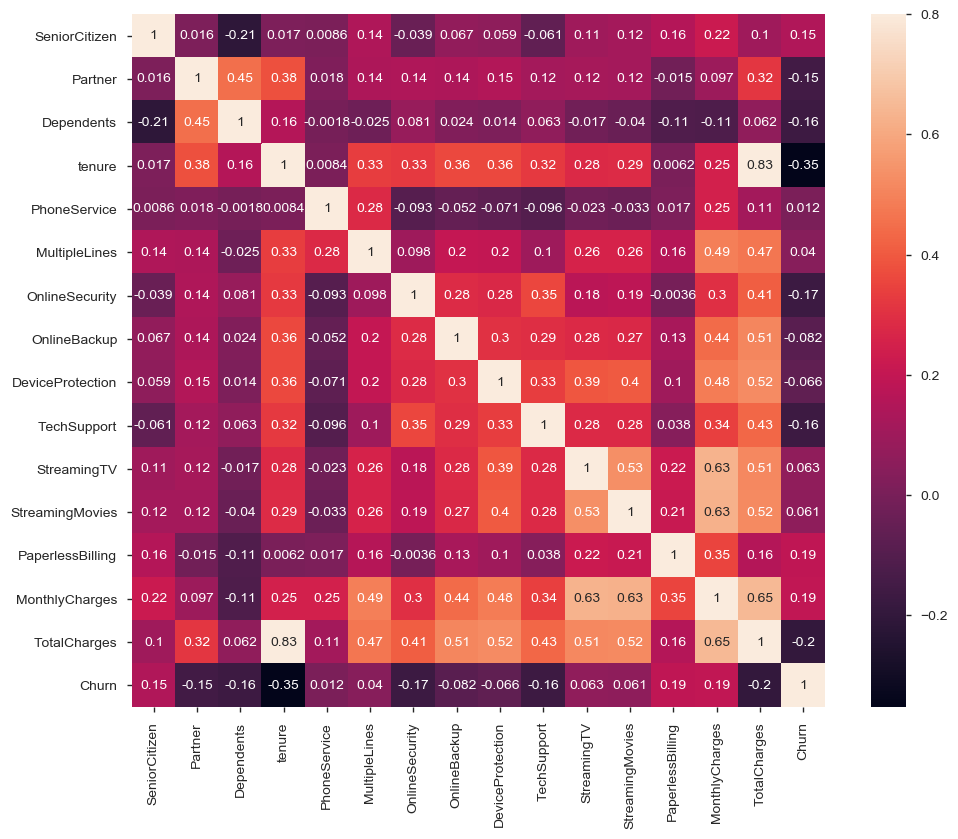

In [10]:
corrmat = dados.corr()
f, ax = plt.subplots(figsize=(12, 9))
%time sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

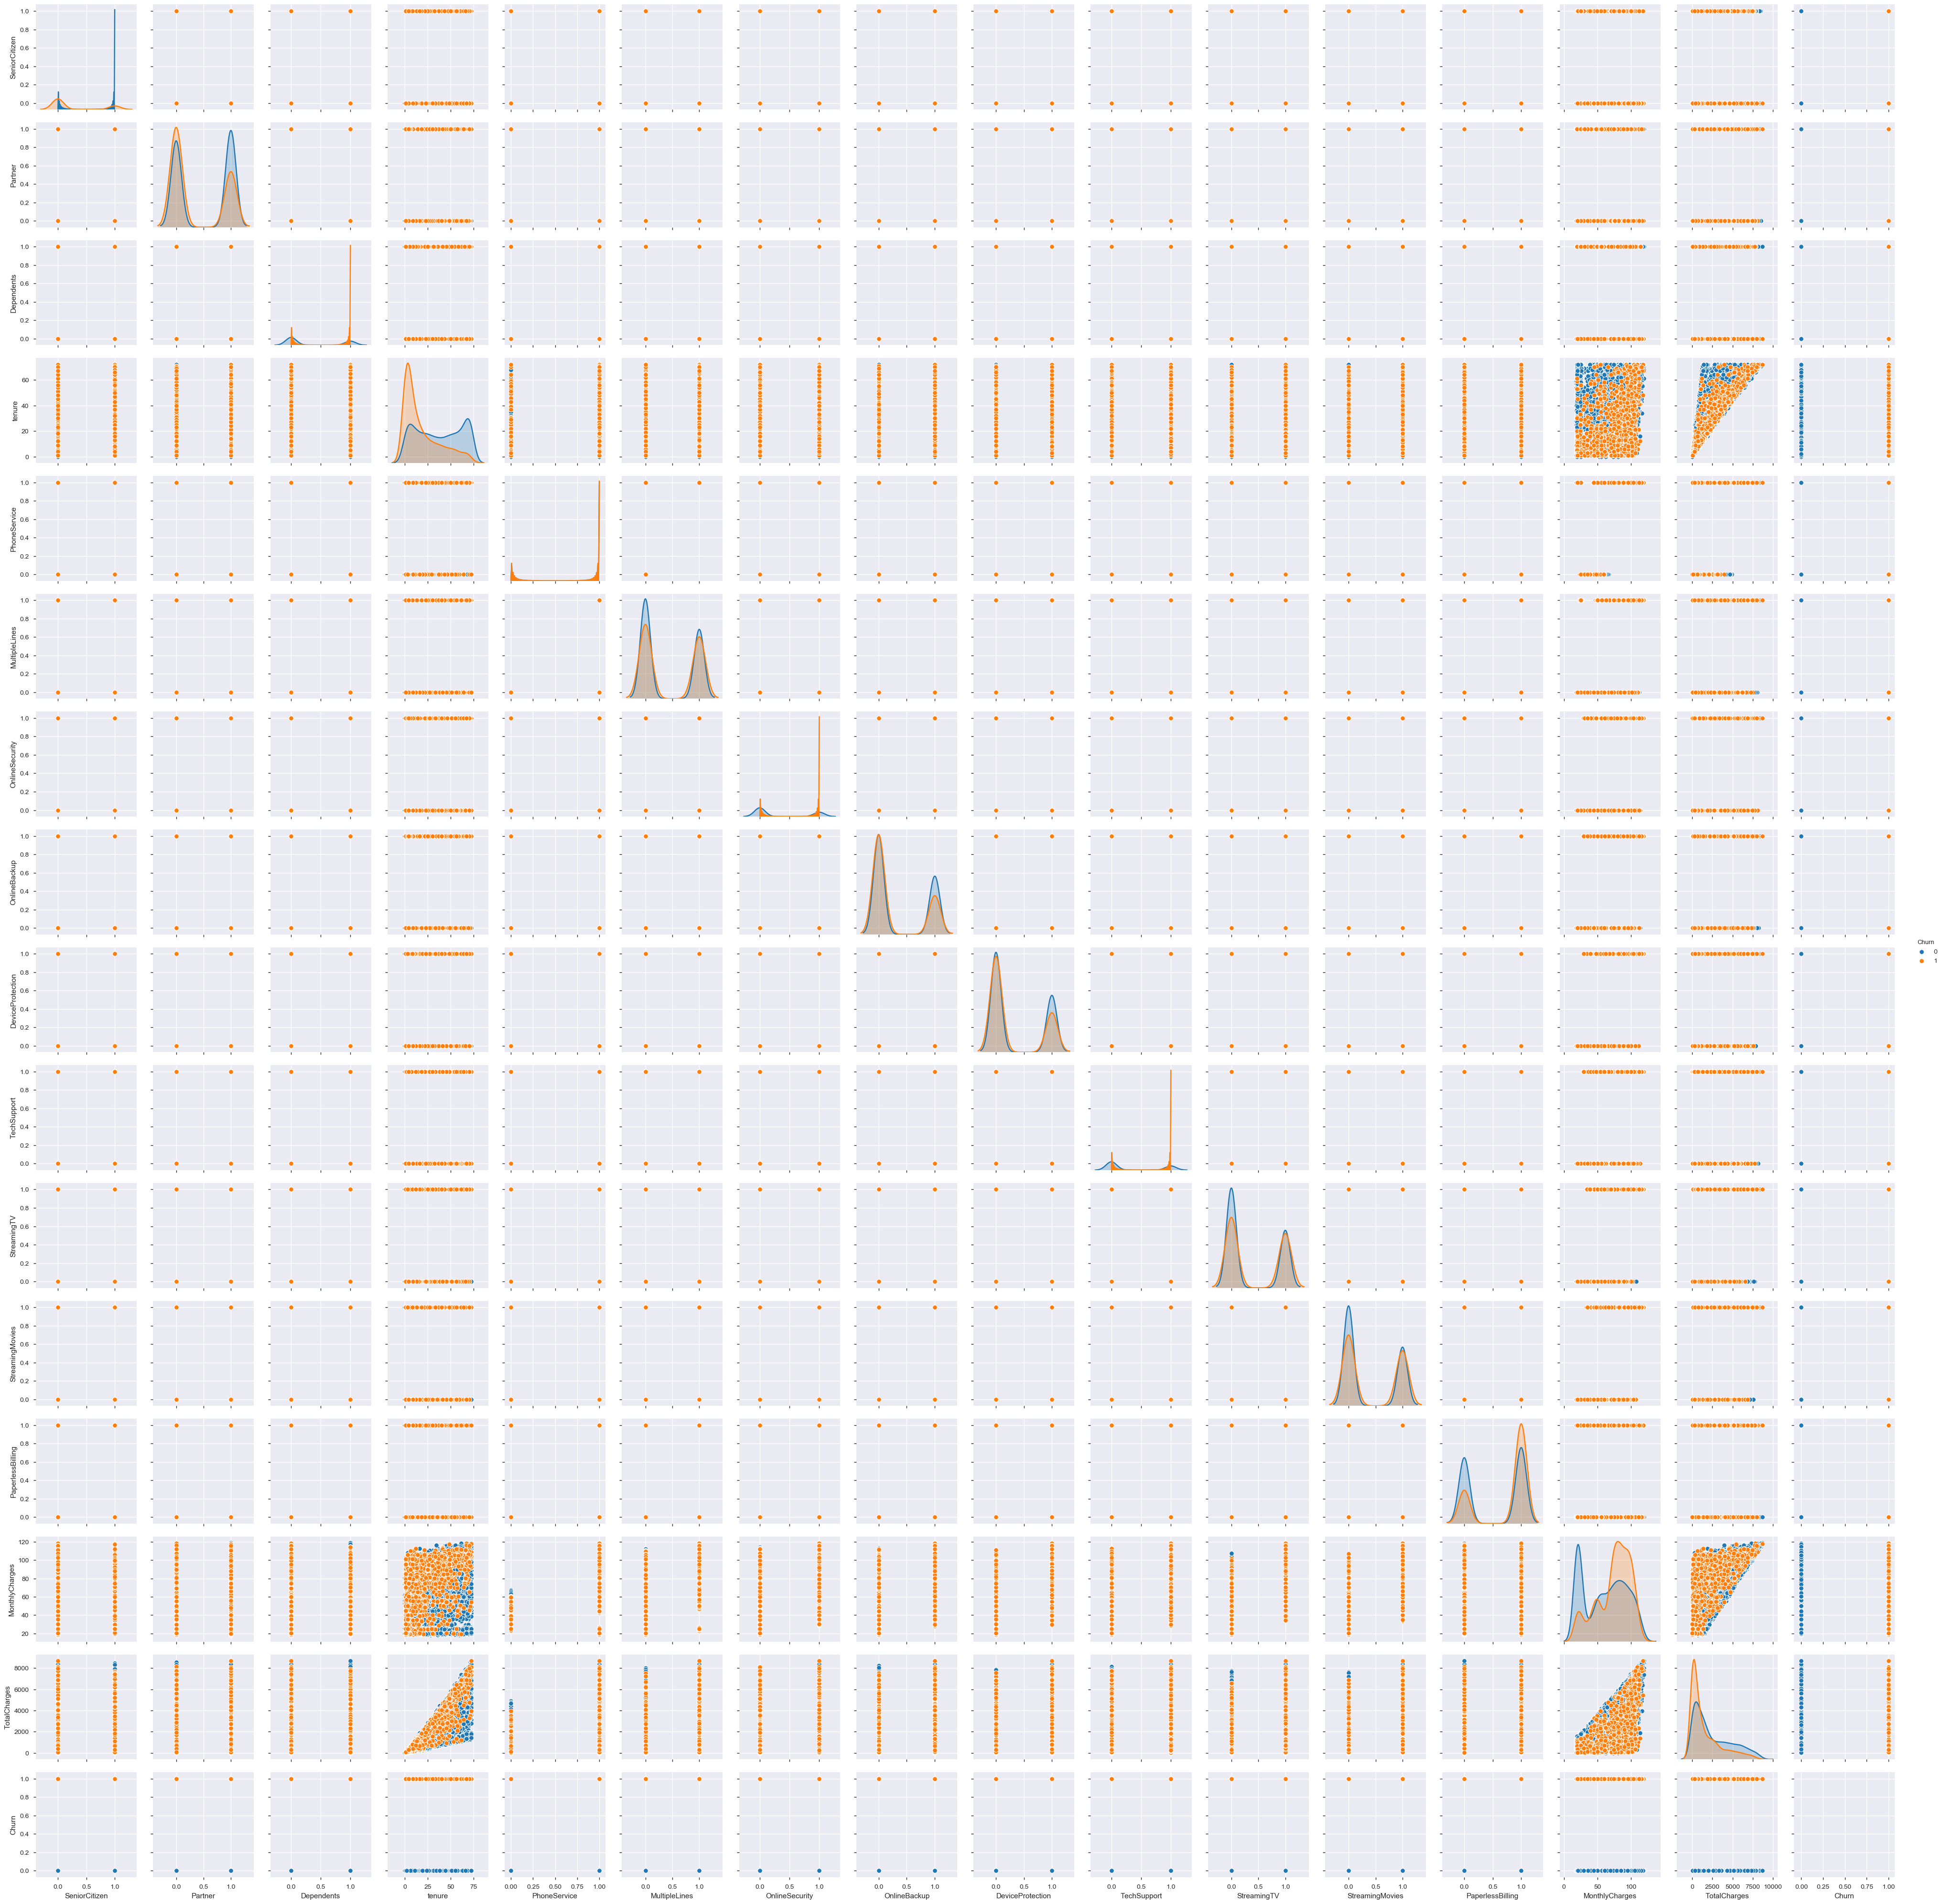

In [9]:
sns.pairplot(dados,hue='Churn')
#sns.pairplot(dados)

### Verficando a necessidade de Balancear os dados com relacao a variavel target

In [12]:
# verificando o tamanho das classes por groupby
dados.groupby('Churn').InternetService.count()

Churn
0    5174
1    1869
Name: InternetService, dtype: int64